In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x, sigma):
    #sigma = sigma[:2, :2]
    coeff = 1/np.sqrt(2*np.pi*np.linalg.det(sigma))
    sigma_i = np.linalg.inv(sigma)
    xp = np.sum(x * np.einsum('...ij,...j->...i', sigma_i, x), axis=-1)
    return -1/2 * xp

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
p = np.stack([X, Y], axis=-1)
levels = np.linspace(-1, 0, 100)

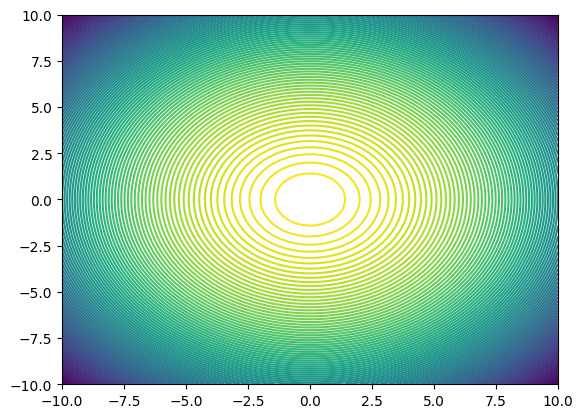

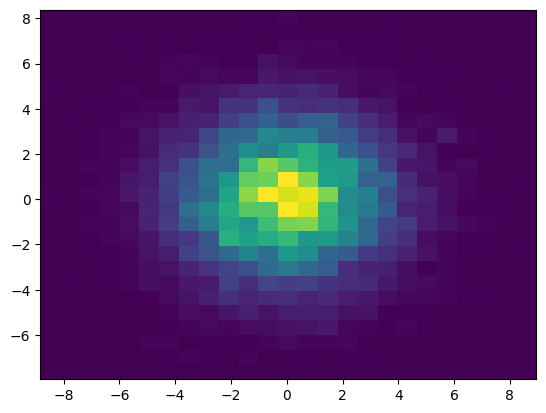

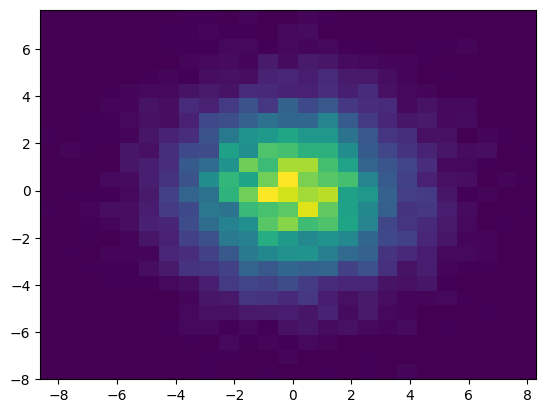

In [4]:
U = np.array([[0, 2],
              [2, 0]])
a1 = 1
a2 = 1
sigma = a1 * U @U.T + a2 * np.eye(2)
plt.contour(X, Y, f(p, sigma), levels=100)
plt.figure()
s1 = np.random.normal(size=(2, 10000))
s2 = np.random.normal(size=(2, 10000))
e_i = np.sqrt(a1)*(U @ s1) + np.sqrt(a2)*(np.eye(2) @ s2)
_ = plt.hist2d(e_i[0], e_i[1], bins=25)
U = np.linalg.cholesky(sigma)
epsilon = np.random.normal(size=(U.shape[1], 10000))
z = (U @ epsilon)
#print(z.shape)
plt.figure()
_ = plt.hist2d(z[0], z[1], bins=25)

In [5]:
np.cov(z), sigma, np.cov(e_i)

(array([[ 4.94958725, -0.09402595],
        [-0.09402595,  4.98035162]]),
 array([[5., 0.],
        [0., 5.]]),
 array([[5.05391189, 0.01357697],
        [0.01357697, 4.95930258]]))

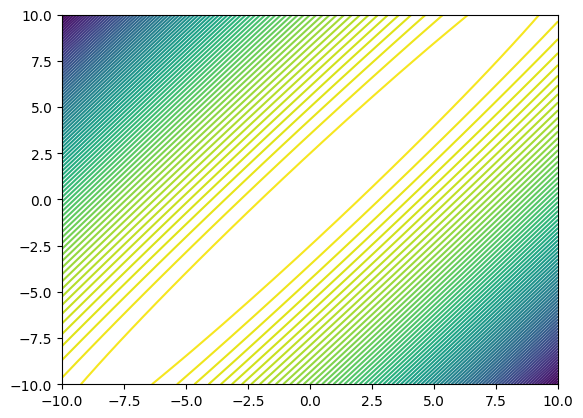

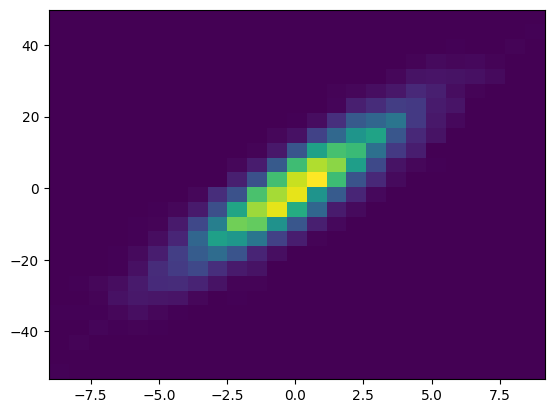

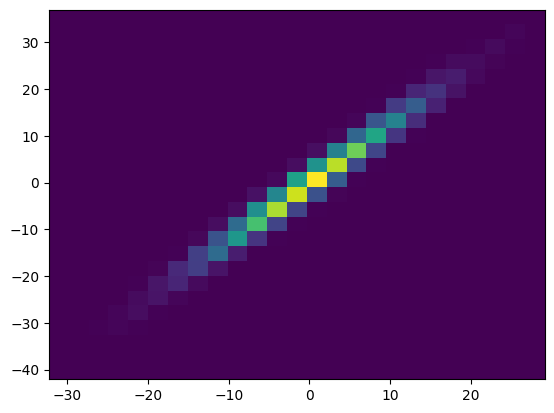

In [6]:
U = np.array([[1, 2],
              [8, 10]])
a1 = 1
a2 = 1
sigma = a1 * U.T @ U + a2 * np.eye(2)
plt.contour(X, Y, f(p, sigma), levels=100)
plt.figure()
s1 = np.random.normal(size=(2, 10000))
s2 = np.random.normal(size=(2, 10000))
e_i = np.sqrt(a1)*(U @ s1) + np.sqrt(a2)*(np.eye(2) @ s2)
_ = plt.hist2d(e_i[0], e_i[1], bins=25)

U = np.linalg.cholesky(sigma)
epsilon = np.random.normal(size=(U.shape[1], 10000))
z = (U @ epsilon)
#print(z.shape)
plt.figure()
_ = plt.hist2d(z[0], z[1], bins=25)

In [8]:
np.cov(z), sigma, np.cov(e_i)

(array([[ 66.91635531,  83.07020537],
        [ 83.07020537, 106.32935441]]),
 array([[ 66.,  82.],
        [ 82., 105.]]),
 array([[  5.85136595,  27.2900825 ],
        [ 27.2900825 , 161.54769277]]))

In [132]:
sigma

array([[ 66.,  82.],
       [ 82., 105.]])

In [133]:
np.cov(e_i)

array([[  6.08187849,  28.45236499],
       [ 28.45236499, 167.15265663]])

In [114]:
e_i.shape

(2, 1000)

In [66]:
(np.cov(e_i) - sigma)/(sigma + (sigma == 0)) * 100

array([[0.50499326, 2.24468192],
       [2.24468192, 0.43588568]])